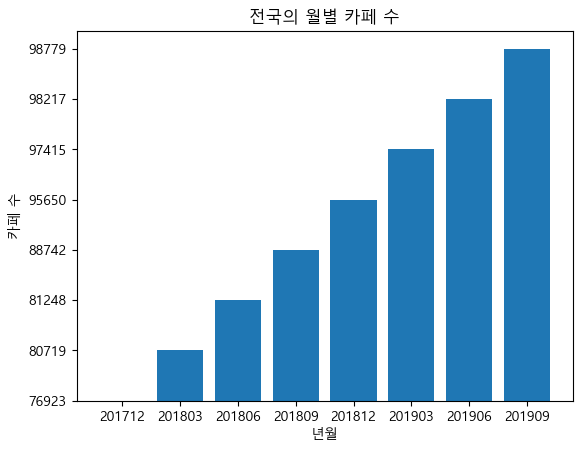

In [13]:
#1. matplotlib 이용하여 월별 카페 개수를 나타내는 간단한 막대그래프 그리는 프로그램
# 조건: 막대그래프 x축 간격을 3달로 설정
# cafe_2year.csv

'''

기준월,카페수
201710,79296
201711,80738
201712,76923
...
201907,98311
201908,98538
201909,98779

'''
%matplotlib inline
import csv
import matplotlib.pyplot as plt
from matplotlib import rc #폰트지정
rc("font",family="Malgun Gothic")

f=open("cafe_2year.csv","r",encoding="utf-8")
lines=csv.reader(f)
header=next(lines)
#구할 것: 날짜 3달 간격 - 월별 카페 개수 : 데이터수 일치해야함(x축-y축 데이터)

#먼저 리스트 안에 넣고 -> 거기서 걸러내기(3달간격)


x1=[]  #빈리스트 지정
y1=[]
for line in lines:
    x1.append(line[0])
    y1.append(line[1])
f.close()


#그래프 작성
plt.title("전국의 월별 카페 수")
plt.bar(x1[2::3],y1[2::3])  #막대그래프 형식으로 제작한다

#plt.ylim(min(y1), max(y1))
plt.xlabel("년월")
plt.ylabel("카페 수")

#시각화
plt.show()

In [4]:
#2.축약(함수사용+리스트)

import csv
f=open("doctor_2019.csv","r",encoding="utf-8")
lines=csv.reader(f)
header=next(lines)
print(header[0],header[2],header[3],header[4],header[5])

city = ["서울", "부산", "대구", "인천", "대전", "광주", "울산"]
total_line2=[0]*7
total_line3=[0]*7
total_line4=[0]*7
total_line5=[0]*7

for line in lines:
    x=line[0]
    if x in city:
        i=city.index(x)
        total_line2[i]+=int(line[2])
        total_line3[i]+=int(line[3])
        total_line4[i]+=int(line[4])
        total_line5[i]+=int(line[5])
f.close()

for i in range(len(city)):
    print(city[i],total_line2[i],total_line3[i],total_line4[i],total_line5[i])

지역 일반의 수 인턴 수 레지던트 수 전문의 수
서울 162 1196 4757 9375
부산 58 197 785 2211
대구 27 215 712 1436
인천 47 138 444 1518
대전 25 142 425 1006
광주 16 102 356 1006
울산 19 23 104 467


In [5]:
#3.수정전초기코드였음 txt파일만들어서 write확인 ___> 3.그대로

import csv
f1=open("doctor_2019.csv","r",encoding="utf-8")
f2=open("doctor2.csv","w",encoding="utf-8",newline="")
lines=csv.reader(f1)
wr=csv.writer(f2)

wr.writerow(["지역,","일반의 수,","인턴 수,","레지던트 수,","전문의 수,"])
next(lines)
city = ["서울", "부산", "대구", "인천", "대전", "광주", "울산"]
total_line2=[0]*7
total_line3=[0]*7
total_line4=[0]*7
total_line5=[0]*7

for line in lines:
    x=line[0]
    if x in city:
        i=city.index(x)
        total_line2[i]+=int(line[2])
        total_line3[i]+=int(line[3])
        total_line4[i]+=int(line[4])
        total_line5[i]+=int(line[5])
for i in range(len(city)):
    wr.writerow([city[i],total_line2[i],total_line3[i],total_line4[i],total_line5[i]])   

print("doctor2.csv 파일 쓰기 완료!")
f1.close()
f2.close()

doctor2.csv 파일 쓰기 완료!


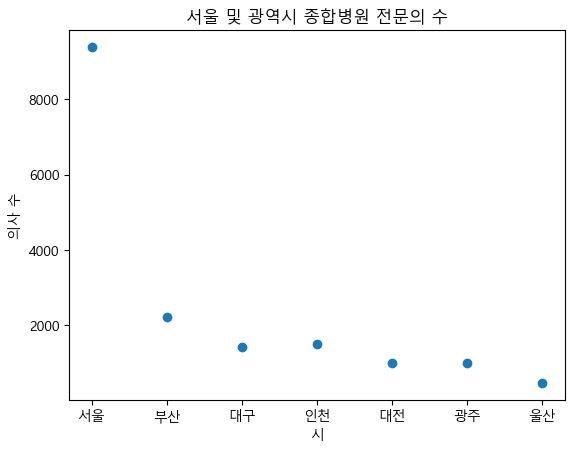

In [6]:
#4. 3번 문제에서 저장한 닥터2 파일 읽어서 서울과 6개 광역시의 종합병원전문의 의사 수를 산포그래프로

'''
"지역,","일반의 수,","인턴 수,","레지던트 수,","전문의 수,"  #종합병원 전문의 수만 구하는 거?
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467

'''
'''
%matplotlib inline #그래프를 여러 개 다뤄야할 때, 그래프를 안에서 만들어주고 싶을 때 사용(시각화 확인 후 제작 가능) -> 쇼를 패스해도 그래프 나옴.
'''
import matplotlib.pyplot as plt
f=open("doctor2.csv","r",encoding="utf-8")
lines=csv.reader(f)
from matplotlib import rc #폰트지정
rc("font",family="Malgun Gothic")
header=next(lines)


x=["서울", "부산", "대구", "인천", "대전", "광주", "울산"] #x축: 지역
#x=[]
y=[]
for line in lines:
    #x.append(line[0])
    y.append(int(line[4]))  #int 안쓰면 그래프가 역순으로?됨: 문자열을 순차적으로 해봤자라서 -> 숫자로 변환 후 필요

        #y.sort()
'''
plt.xlim(min(x),max(x))
plt.ylim(min(y),max(y))
'''         


plt.title("서울 및 광역시 종합병원 전문의 수")
plt.scatter(x,y)
plt.xlabel("시")
plt.ylabel("의사 수")

plt.show()


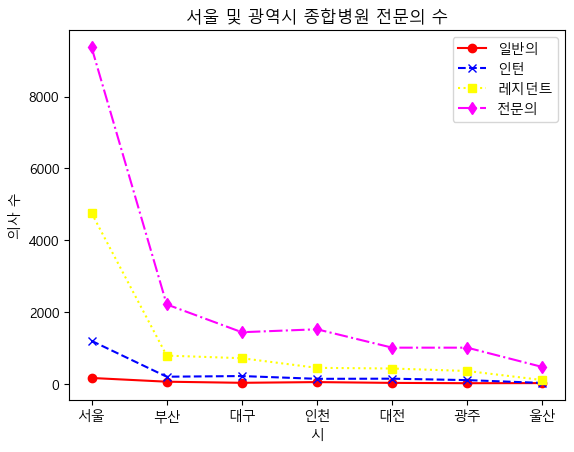

In [7]:
#5. 4번에서 사용한 닥터2 파일 읽어서 서울/6개 광역시의 종합병원의 일반의,인턴,레지던트,전문의 의사 수를 선 그래프로

# 서울 /6개 광역시의 종합병원의 일반의,인턴,레지던트,전문의 의사 수를 선 그래프

'''
"지역,","일반의 수,","인턴 수,","레지던트 수,","전문의 수,"  #종합병원 전문의 수만 구하는 거?
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467

'''

import matplotlib.pyplot as plt
f=open("doctor2.csv","r",encoding="utf-8")
lines=csv.reader(f)
from matplotlib import rc #폰트지정
rc("font",family="Malgun Gothic")
header=next(lines)

x=["서울", "부산", "대구", "인천", "대전", "광주", "울산"]
y1=[] #일반의
y2=[] #인턴
y3=[] #레지던트
y4=[] #전문의

for line in lines:
    y1.append(int(line[1]))
    y2.append(int(line[2]))
    y3.append(int(line[3]))
    y4.append(int(line[4]))

#일반의 - 빨간색  인턴 - 파란색  레지던트 - 노란색  전문의 - 마젠타
plt.plot(x,y1,label="일반의",color="red",linestyle="-",marker="o")
plt.plot(x,y2,label="인턴",color="blue",linestyle="--",marker="x")
plt.plot(x,y3,label="레지던트",color="yellow",linestyle=":",marker="s")
plt.plot(x,y4,label="전문의",color="magenta",linestyle="-.",marker="d")

plt.title("서울 및 광역시 종합병원 전문의 수")
plt.xlabel("시")
plt.ylabel("의사 수")
plt.legend(loc="best")

plt.show()

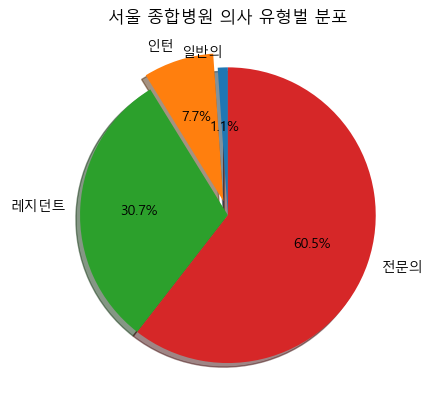

In [8]:
#6. 서울 / 종합병원의 의사 수 / 의사 유형별로 / 파이그래프
'''

"지역,","일반의 수,","인턴 수,","레지던트 수,","전문의 수,"  #종합병원 전문의 수만 구하는 거?
서울,162,1196,4757,9375
부산,58,197,785,2211
대구,27,215,712,1436
인천,47,138,444,1518
대전,25,142,425,1006
광주,16,102,356,1006
울산,19,23,104,467

'''

import matplotlib.pyplot as plt
f=open("doctor2.csv","r",encoding="utf-8")
lines=csv.reader(f)

from matplotlib import rc #폰트지정
rc("font",family="Malgun Gothic")

header=next(lines)

x=["일반의","인턴","레지던트","전문의"]
portion=[1.1,7.7,30.7,60.5]

'''
for line in lines:
    y1.append(int(line[1]))
    y2.append(int(line[2]))
    y3.append(int(line[3]))
    y4.append(int(line[4]))

#일반의 - 빨간색  인턴 - 파란색  레지던트 - 노란색  전문의 - 마젠타
plt.plot(x,y1,label="일반의",color="red",linestyle="-",marker="o")
plt.plot(x,y2,label="인턴",color="blue",linestyle="--",marker="x")
plt.plot(x,y3,label="레지던트",color="yellow",linestyle=":",marker="s")
plt.plot(x,y4,label="전문의",color="magenta",linestyle="-.",marker="d")
'''

plt.title("서울 종합병원 의사 유형벌 분포")
plt.pie(portion,explode=(0,0.1,0,0),labels=x,autopct="%1.1f%%",shadow=True,startangle=90)
        
'''
plt.xlabel("시")
plt.ylabel("의사 수")
plt.legend(loc="best")
'''
plt.show()